In [2]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

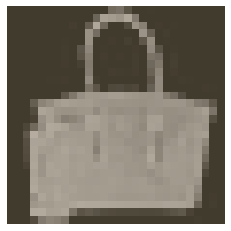

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [4]:
# TODO: Define your network architecture here
from torch import nn
from collections import OrderedDict

layers = OrderedDict([
    ('fc1', nn.Linear(784,128)),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(128,64)),
    ('relu2', nn.ReLU()),
    ('output', nn.Linear(64,10)),
    ('softmax', nn.LogSoftmax(dim=1))
])

model = nn.Sequential(layers)

In [5]:
# TODO: Create the network, define the criterion and optimizer

from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [9]:
images.shape

torch.Size([32, 1, 28, 28])

In [21]:
# TODO: Train the network here
for i in range(1):
    running_loss = 0
    for images,labels in trainloader:
        images = images.view(images.shape[0], -1) # preferred way for reshaping inputs tensors
        optimizer.zero_grad()
        out = model.forward(images)
        loss = criterion(out,labels)
        print(loss,loss.item())
        running_loss += loss.item()

        loss.backward()
        optimizer.step()
    print(running_loss/len(trainloader))

tensor(0.2171, grad_fn=<NllLossBackward>) 0.21709464490413666
tensor(0.2950, grad_fn=<NllLossBackward>) 0.2950046956539154
tensor(0.2689, grad_fn=<NllLossBackward>) 0.2689116299152374
tensor(0.6148, grad_fn=<NllLossBackward>) 0.614825427532196
tensor(0.3779, grad_fn=<NllLossBackward>) 0.3779080808162689
tensor(0.2566, grad_fn=<NllLossBackward>) 0.25664305686950684
tensor(0.3931, grad_fn=<NllLossBackward>) 0.39305055141448975
tensor(0.2802, grad_fn=<NllLossBackward>) 0.28022271394729614
tensor(0.2586, grad_fn=<NllLossBackward>) 0.258571594953537
tensor(0.2973, grad_fn=<NllLossBackward>) 0.29732176661491394
tensor(0.2347, grad_fn=<NllLossBackward>) 0.23471646010875702
tensor(0.2678, grad_fn=<NllLossBackward>) 0.26775142550468445
tensor(0.2533, grad_fn=<NllLossBackward>) 0.25326359272003174
tensor(0.3935, grad_fn=<NllLossBackward>) 0.3934526741504669
tensor(0.3911, grad_fn=<NllLossBackward>) 0.391071081161499
tensor(0.3441, grad_fn=<NllLossBackward>) 0.3440617024898529
tensor(0.3236, grad

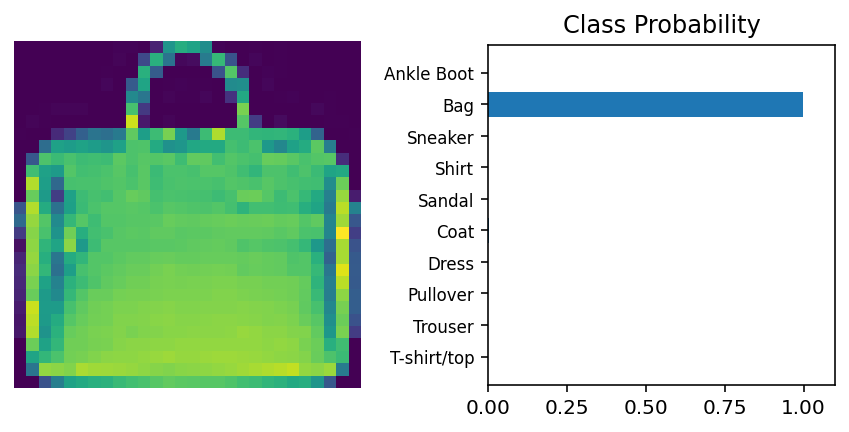

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')